In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [52]:
com = pd.read_csv('/Users/mitssverma/Documents/Technocolabs/Dataset/companies.csv')
com.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [53]:
com.shape

(196553, 44)

Shape of our dataset : (196553, 44)

In [54]:
com.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


Short description of our dataset, this will give us the short summary of dataset it gives the 
- counts 
- mean 
- standard deviation
- minimum
- 1st quantile
- 2nd quantile
- 3rd quantile 
- maximum value of each columns.

In [55]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

Information about the dataset.
- RangeIndex : 0 - 196552
- columns : 44
- dtypes : float(12), int(2), object(30)

In [56]:
com.duplicated().sum()

0

No duplicates present in our dataset.

In [57]:
com.isna().sum()

id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       22
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_to

There are so many null values present in our dataset, there are only 9 columns with 0 null values and some of the columns are of completely null values or empty columns, also some of the columns only have few entries.
So, going to drop all those unnecessary columns with all the null values and will not required in further analysis.

In [58]:
data = com.drop(columns = ['id','entity_type','permalink','region','created_by','Unnamed: 0.1','normalized_name','parent_id','domain','homepage_url','logo_url','logo_width','logo_height','overview','short_description','twitter_username','short_description','description','tag_list','state_code','city','first_investment_at', 'last_investment_at','first_milestone_at','last_milestone_at',  'first_funding_at','last_funding_at','lat','lng'])
data.head()

,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI
0,1,Wetpaint,web,operating,2005-10-17,NaN,USA,NaN,NaN,3.0,39750000.0,5.0,17.0,2007-05-25 06:51:27,2013-04-13 03:29:00,15.5
1,10,Flektor,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,6.0,2007-05-31 21:11:51,2008-05-23 23:23:14,NaN
2,100,There,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,4.0,12.0,2007-08-06 23:52:45,2013-11-04 02:09:48,NaN
3,10000,MYWEBBO,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN
4,10001,THE Movie Streamer,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN


**- Droping the unwanted columns:**

'id','Unnamed:0.1','normalized_name','parent_id','domain','homepage_url','logo_url','logo_width','logo_height','overview',
'short_description','twitter_username','description','tag_list','country_code','state_code','city','first_investment_at','last_investment_at','first_milestone_at',
'last_milestone_at','first_funding_at','last_funding_at','lat','lng'
- Dropping all these columns because
 - Some columns are empty.
 - Unwanted object columns.
 - 70% of Null values present in the columns.
 - Empty columns.
 - Unnecessary columns.

In [59]:
data.shape

(196553, 16)

Now, the shape of our dataset after droping columns: 

## Dropping Null rows:

In [60]:
data.dropna(subset= ['name','country_code','category_code','founded_at'],inplace = True)
data.shape

(64094, 16)

## Filling the missing values

**- Filling the Investment Rounds columns with the median() method, as rounds cannot be in float datatype**

In [61]:
data['investment_rounds'] = data['investment_rounds'].fillna(data['investment_rounds'].median())

**- Filling the Invested Companies columns with the median() method, as in our dataset the Invested Companies data is in integer so it cannot be in float datatype**

In [62]:
data['invested_companies'].value_counts()

1.0      460
2.0      104
3.0       56
4.0       26
5.0       23
6.0       14
7.0       13
14.0       6
16.0       5
9.0        4
8.0        4
11.0       2
10.0       2
29.0       2
38.0       2
26.0       2
18.0       2
24.0       2
21.0       2
20.0       2
57.0       1
68.0       1
44.0       1
124.0      1
12.0       1
39.0       1
79.0       1
268.0      1
30.0       1
73.0       1
459.0      1
33.0       1
13.0       1
47.0       1
17.0       1
51.0       1
Name: invested_companies, dtype: int64

In [63]:
data['invested_companies'] = data['invested_companies'].fillna(data['invested_companies'].median())

**- Filling the Funding Rounds columns with the median() method, as in our dataset the Funding Rounds data is in integer so it cannot be in float datatype.**

In [64]:
data['funding_rounds'].value_counts()

1.0     13378
2.0      4964
3.0      2367
4.0      1100
5.0       561
6.0       239
7.0       136
8.0        62
9.0        42
10.0       22
11.0       10
13.0        4
12.0        3
15.0        2
14.0        1
Name: funding_rounds, dtype: int64

In [65]:
data['funding_rounds'] = data['funding_rounds'].fillna(data['funding_rounds'].median())

**- Filling the Funding Total USD columns with the mean() method, as in Funding Total USD is an int type and can be float data.**

In [66]:
data['funding_total_usd'] = data['funding_total_usd'].fillna(data['funding_total_usd'].mean())

**- Filling the Milestones columns with the mode() method.**

In [67]:
data['milestones'].value_counts()

1.0    24691
2.0     7478
3.0     2478
4.0      458
5.0      139
6.0       45
7.0        7
8.0        3
9.0        1
Name: milestones, dtype: int64

In [68]:
data['milestones'] = data['milestones'].fillna(data['milestones'].mode()[0])

**- Filling the Relationships columns with the mean() method.**

In [69]:
data['relationships'].value_counts()

1.0      13943
2.0      10982
3.0       7221
4.0       4384
5.0       2723
         ...  
183.0        1
155.0        1
122.0        1
387.0        1
67.0         1
Name: relationships, Length: 137, dtype: int64

In [70]:
data['relationships'] = data['relationships'].fillna(data['relationships'].mean())

**- Filling the ROI columns with the mean() method.**

In [71]:
data['ROI'].value_counts()

10.000000    6
15.000000    4
16.666667    3
3.333333     3
5.000000     3
            ..
57.777778    1
0.232143     1
7.788945     1
0.675219     1
24.137931    1
Name: ROI, Length: 504, dtype: int64

In [72]:
data['ROI'] = data['ROI'].fillna(data['ROI'].mean())

## Datetime columns :

**- Converting the dtype to datetime.**

In [73]:
data['founded_at'] = pd.to_datetime(data['founded_at'])
data['founded_at'] = data['founded_at'].dt.year

**- Filling the null values with mode()**

In [74]:
data['founded_at'] = data['founded_at'].fillna(data['founded_at'].mode()[0])

**- Converting the dtype to datetime.**

In [75]:
data['closed_at'] = pd.to_datetime(data['closed_at'])
data['closed_at'] = data['closed_at'].dt.year

**- Filling the closed_at column with some condition.**
- If Status is operating or ipo, fillna with 2021
- If Status is accquired or closed, fillna with mode()

In [76]:
data['closed_at'].mode()[0]

2012.0

In [77]:
for i in data['status']:
    if (i == 'operating' or 'ipo'):
        data['closed_at'].fillna(2021,inplace = True)
    elif (i == 'accquired' or 'closed'):
        data['closed_at'].fillna(2012, inplace = True)

## Updateing the Date columns and taking only the year from it.

In [78]:
created = []
for i in data['created_at']:
    created.append(i.split('-')[0])
data['created_at']= created

In [79]:
created = []
for i in data['updated_at']:
    created.append(int(i.split('-')[0]))
data['updated_at']= created

## Adding new updated columns :

**-Adding Companies Age(in years), by subtracting founded at from closed at columns.**

In [80]:
data['companies_age'] = data['closed_at'] - data['founded_at']

**- After substraction, some of the entries will be negative value, so will remove negative value.**

In [81]:
index = np.where(data['companies_age'] < 0)
data['companies_age'] = data['companies_age'].drop(data['companies_age'].index[index])

In [82]:
data['companies_age'] = data['companies_age'].fillna(0)

In [83]:
data.head()

,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age
0,1,Wetpaint,web,operating,2005,2021.0,USA,1.0,1.0,3.0,3.975000e+07,5.0,17.00000,2007,2013,15.50000,16.0
5,10002,Synergie Media,advertising,operating,2007,2021.0,MAR,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,14.0
6,10003,Green Basti Ecosystems,cleantech,operating,2008,2021.0,IND,1.0,1.0,1.0,1.581978e+07,1.0,4.43465,2008,2010,14.41045,13.0
12,10009,dimension5 labs,advertising,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,13.0
13,1001,FriendFeed,web,acquired,2007,2021.0,USA,1.0,1.0,1.0,5.000000e+06,3.0,14.00000,2007,2013,9.50000,14.0


In [84]:
data.isna().sum()

entity_id             0
name                  0
category_code         0
status                0
founded_at            0
closed_at             0
country_code          0
investment_rounds     0
invested_companies    0
funding_rounds        0
funding_total_usd     0
milestones            0
relationships         0
created_at            0
updated_at            0
ROI                   0
companies_age         0
dtype: int64

There are no null values present in our cleaned dataset.

In [85]:
data.reset_index(inplace = True)

As dropping null values from dataset, the indexes are distrubted so using reset_index() to reset the index.

In [86]:
data.shape

(64094, 18)

Final dataset shape is (64094, 18)

## Insights:

In [40]:
def plot(x,y,data):
    plt.figure(figsize=(10,10))
    plt.scatter(x,y,data=data)
    plt.xlabel(x)
    plt.ylabel(y)
    print('Scatterpot between',x,'and',y)
    plt.show()

Scatterpot between status and category_code


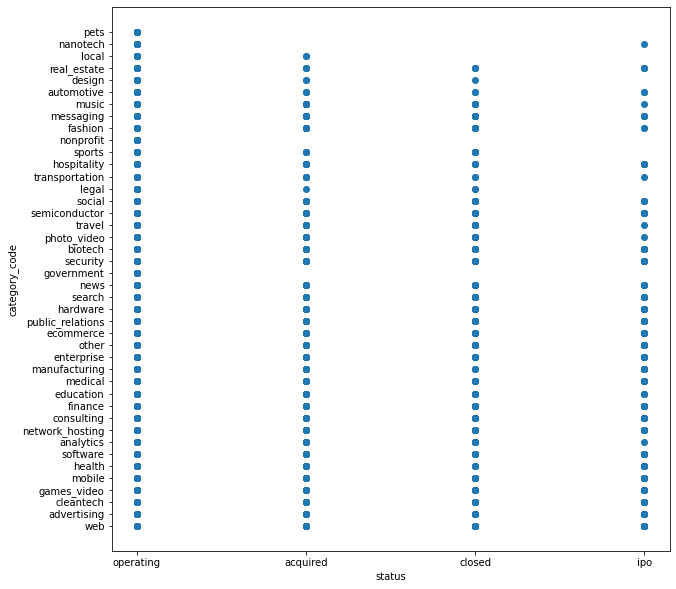

In [41]:
plot('status','category_code',data=data)

**Scatterplot between status and category code columns.**
- There are each category of company present in each status of company.
- Equally distributed, between status

Scatterpot between funding_total_usd and category_code


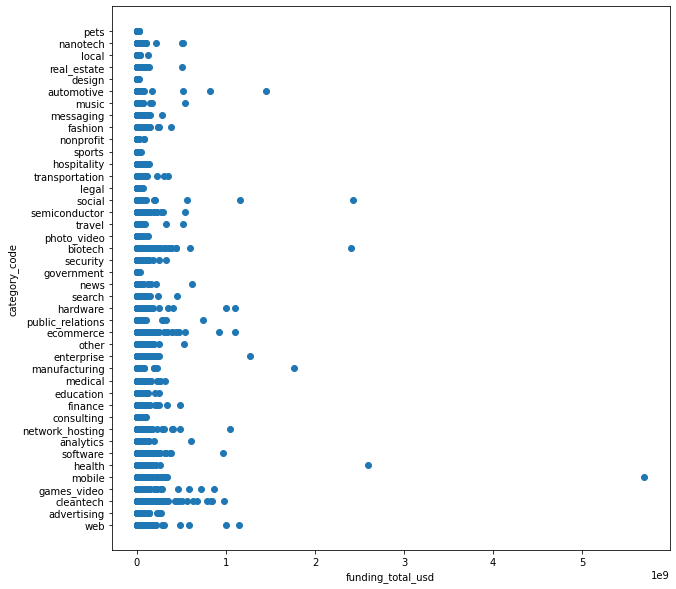

In [40]:
plot(x='funding_total_usd',y='category_code',data=data)

**Scatterplot between Total funding and category code.**
- Mobile sector are having large amount of funding.
- Then, Health,Social and biotech are next large amount of funding.
- Manufacturing is the next in terms of fundings.
- And the design category is funding the smallest amount among all.

Scatterpot between investment_rounds and category_code


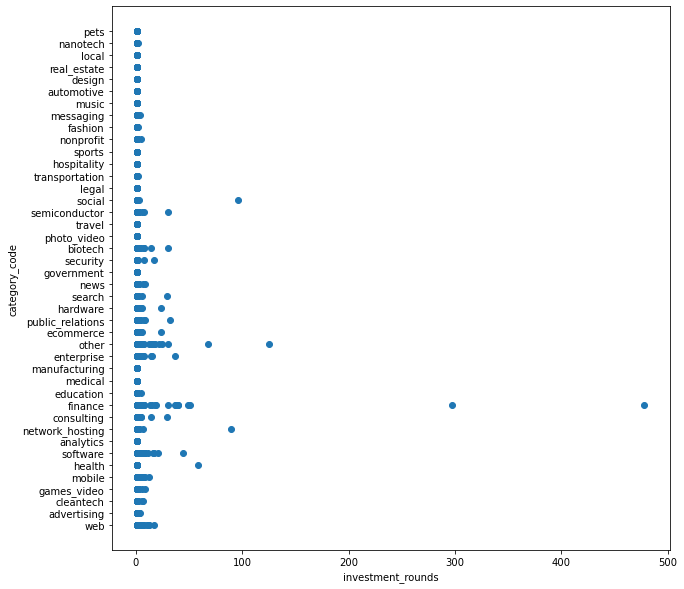

In [41]:
plot(x='investment_rounds',y='category_code',data=data)

**Scatterplot between Investment Rounds and category code.**
- Finance sector is the highest in investing rounds.
- Other category is the top 2 in investing rounds
- Next are, Social and netwrok hosting and are on the same line in investing rounds
- Most of the category lies on the same rounds and its hard to analysis which one is having lowest investing rounds.

Scatterpot between funding_rounds and category_code


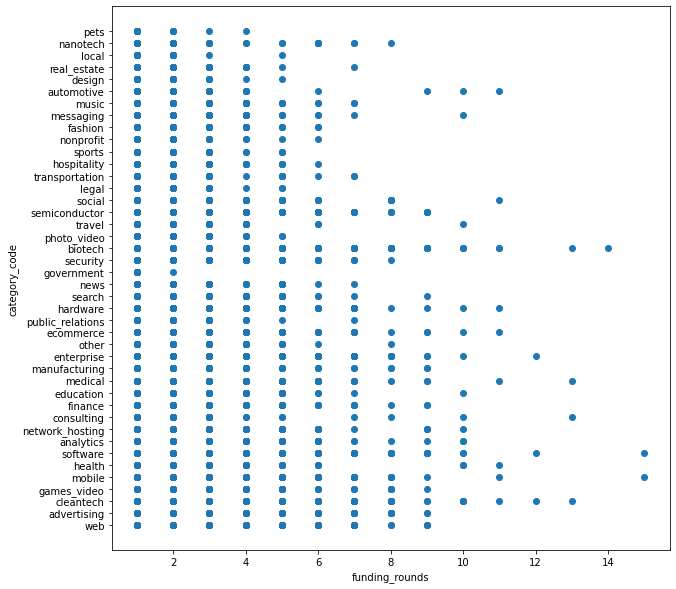

In [42]:
plot(x='funding_rounds',y='category_code',data=data)

**Scatterplot between Funding Rounds and category code.**
- Mobile and software are the top category in funding rounds.
- Biotech is on the 2nd in funding rounds.
- Medical is the next in funding rounds.
- And Government and Local categories are the lowest in the funding rounds.

Scatterpot between relationships and category_code


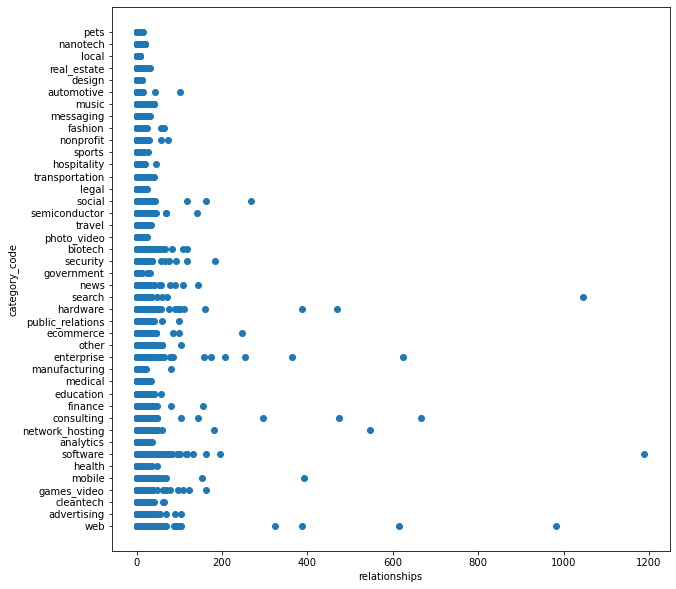

In [43]:
plot(x='relationships',y='category_code',data=data)

**Scatterplot between Relationship and category code.**
- Software category has the stronges relationship.
- Search and web are on the same scale in terms of relationship.
- Consulting category is the next in relationship.
- Local category is having the weakest relationship

Scatterpot between invested_companies and category_code


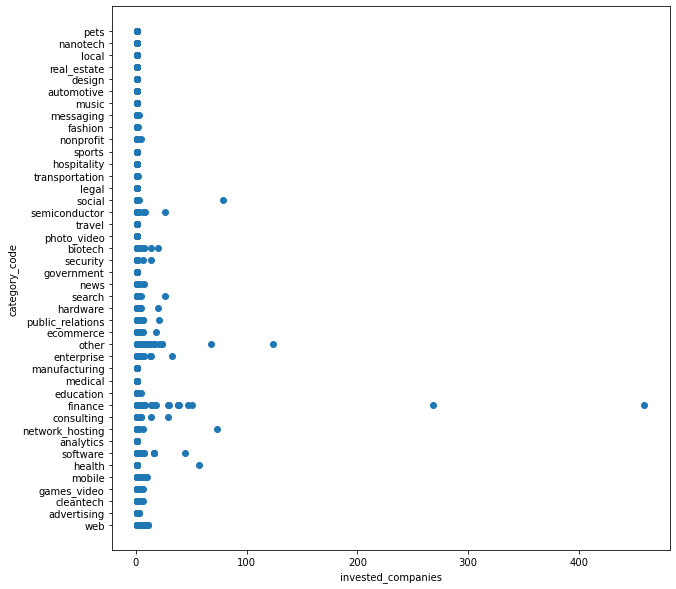

In [44]:
plot(x='invested_companies',y='category_code',data=data)

**Scatterplot between Invested companies and category code.**
- Finance category has the most of the invested companies.
- Other are the another category having the most of the invested companies.
- Network hosting and Social are the top 3rd in invested companies.
- And, there are many category having the lowest invested companies, like, Pets, Nanotech, Local, Real Estate and many more.

Scatterpot between milestones and category_code


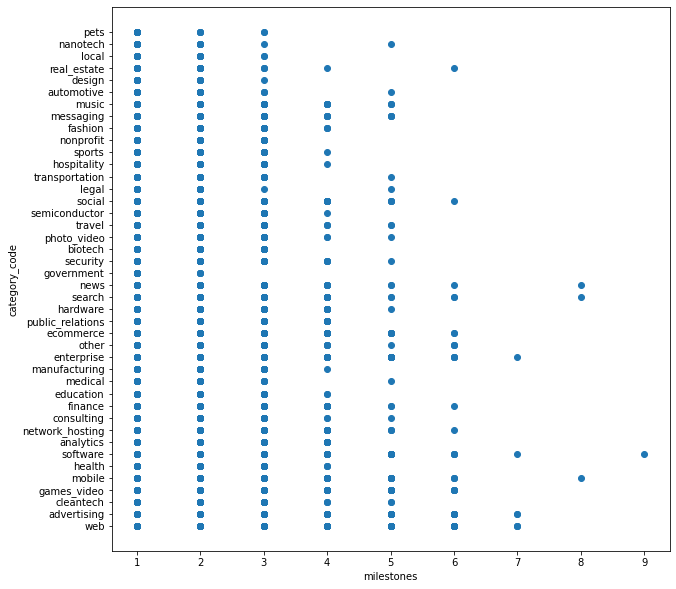

In [45]:
plot(x='milestones',y='category_code',data=data)

**Scatterplot between Milestones and category code.**
- Top Categories in terms of Milestones are:
 - Software.
 - Mobile, Search, News all lies on the same scale.
 - Web, Advertising, Enterprise are the next and on the same scale.
- Lowest categories in terms of Milestones:
 - Government.
 - Pets, Local, Non-Profit are on the same scale.

In [46]:
def splot(x,y,data):
    plt.scatter(x,y,data=data)
    plt.xlabel(x)
    plt.ylabel(y)
    print('Scatterpot between',x,'and',y)
    plt.show()

Scatterpot between status and funding_total_usd


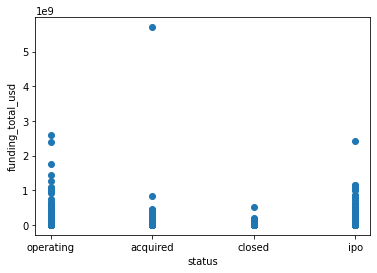

In [47]:
splot(y='funding_total_usd',x='status',data=data)

**Scatterplot between Total Funding and Status.**
- Top to down in Total Funding:
 - Acquired
 - Operating
 - IPO
 - Closed

Scatterpot between status and investment_rounds


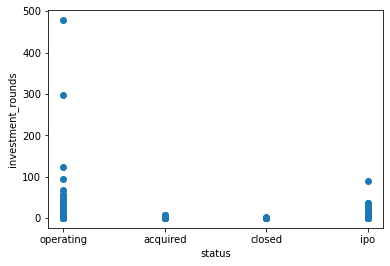

In [48]:
splot(y ='investment_rounds',x ='status',data=data)

**Scatterplot between Investment Rounds and Status.**
- Top to down in Investment Rounds:
 - Operating
 - IPO
 - Acquired
 - Closed

Scatterpot between status and funding_rounds


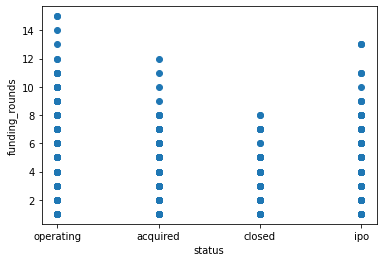

In [49]:
splot(y ='funding_rounds',x ='status',data=data)

**Scatterplot between Funding Rounds and Status.**
- Top to down in Funding Rounds:
 - Operating
 - IPO
 - Acquired
 - Closed

Scatterpot between status and invested_companies


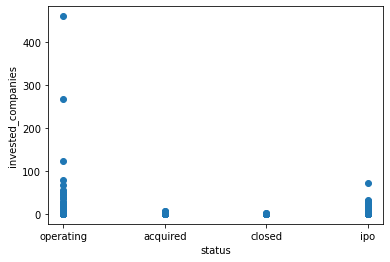

In [50]:
splot(y ='invested_companies',x ='status',data=data)

**Scatterplot between Invested Companies and Status.**
- Top to down in Invested Companies:
 - Operating
 - IPO
 - Acquired
 - Closed

Scatterpot between status and relationships


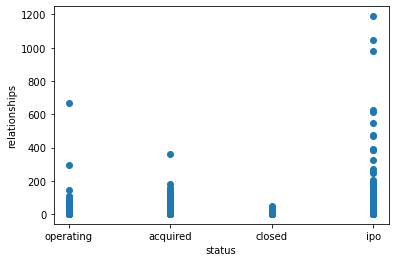

In [51]:
splot(y ='relationships',x ='status',data=data)

**Scatterplot between Relationship and Status.**
- Top to down in Relationship:
 - IPO
 - Operating
 - Acquired
 - Closed

Scatterpot between status and milestones


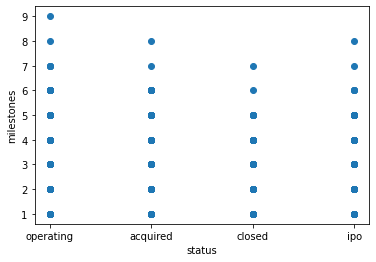

In [52]:
splot(y ='milestones',x ='status',data=data)

**Scatterplot between Milestones and Status.**
- Top to down in Milestones:
 - Operating
 - IPO & Acquired
 - Closed

Scatterpot between status and ROI


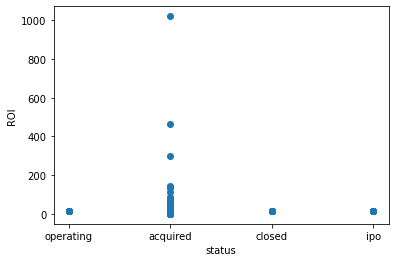

In [53]:
splot(y ='ROI',x ='status',data=data)

**Scatterplot between ROI and Status.**
- Top to down in ROI:
 - Acquired
 - Operating, Closed & IPO

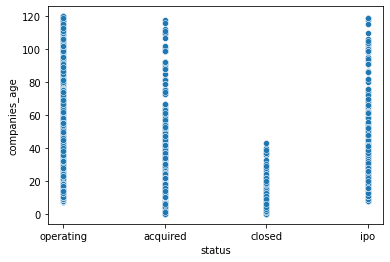

In [54]:
sns.scatterplot(y = 'companies_age',x='status',data=data)
plt.show()

**Scatterplot between Companies age and Status.**
- Top to down in Companies age:
 - Operating, Acquired & IPO
 - Closed

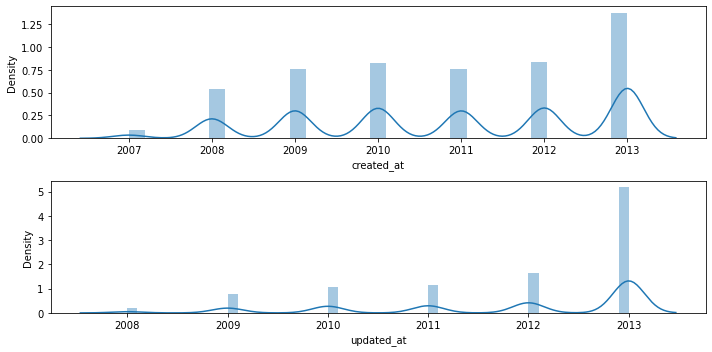

In [55]:
plt.figure(figsize=(10,5))
plotnumber = 1

for column in data[['created_at','updated_at']]:
    if plotnumber <= 2:
        ax = plt.subplot(2,1,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 10)
    
    plotnumber+=1
plt.tight_layout()

**Distplot for Created at and Updated at**
- Created at : Most of the companies are established at 2013.
- Updated at : And also most of the companies are Updated at 2013.

<AxesSubplot:xlabel='status', ylabel='Count'>

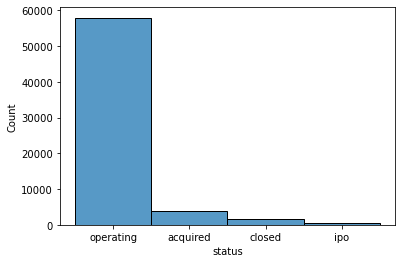

In [56]:
sns.histplot(data.status,bins=10)

**Histplot of our target columns i.e. status**

<AxesSubplot:xlabel='category_code', ylabel='Count'>

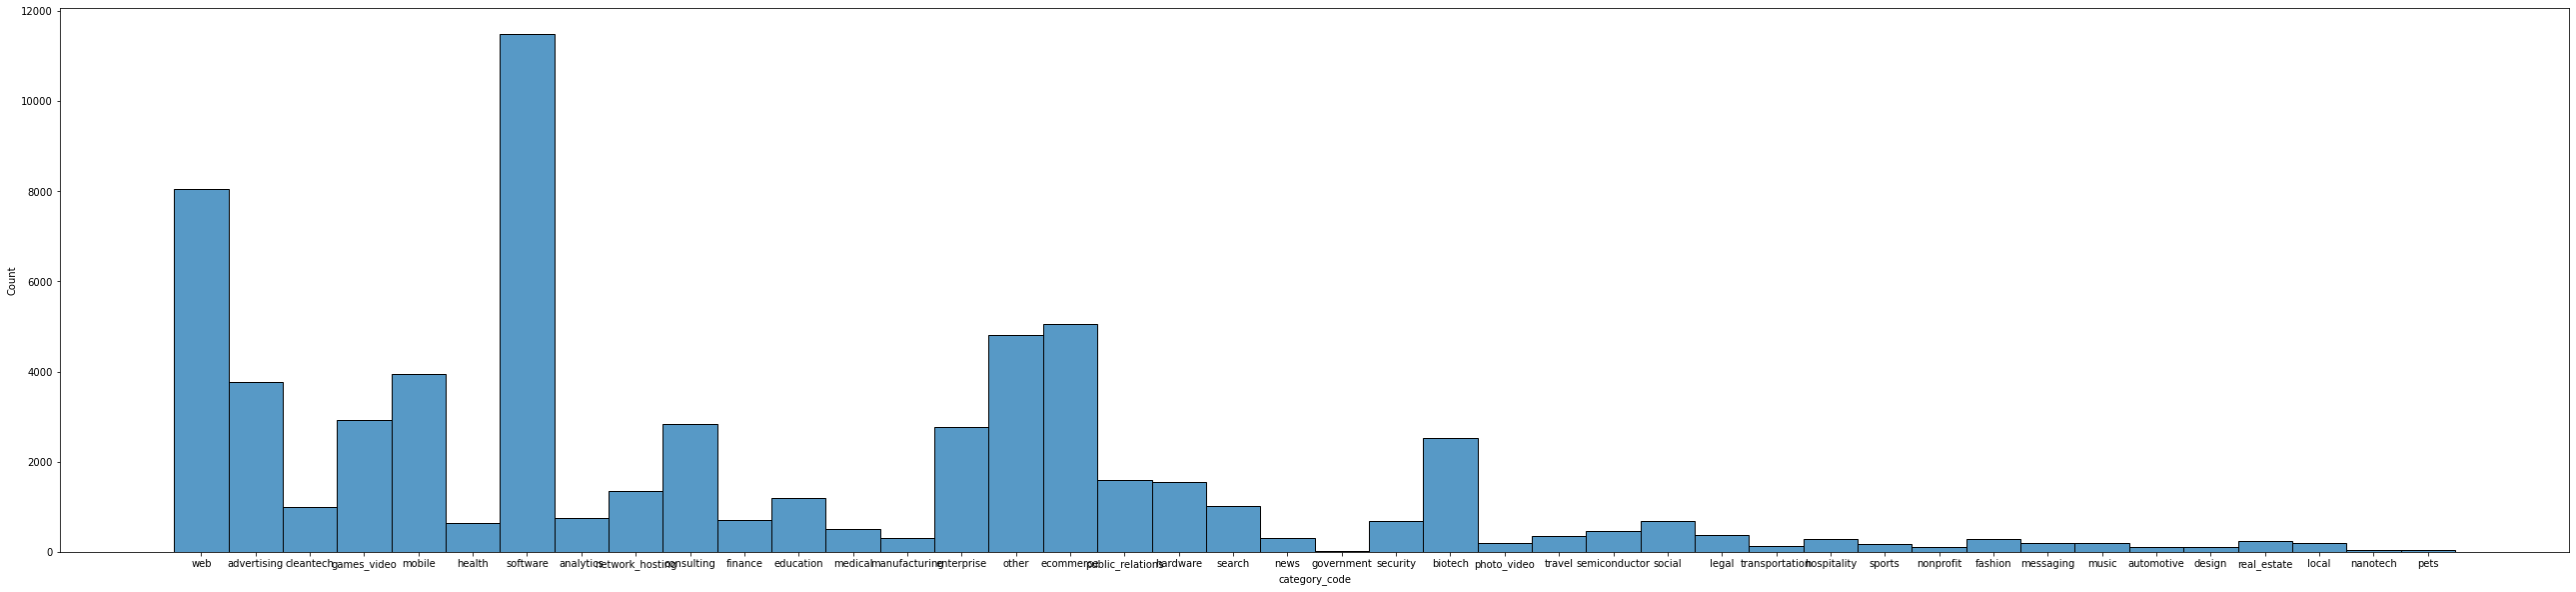

In [57]:
plt.figure(figsize= (45,10))
sns.histplot(data.category_code)

**Top 10 category in category_code are:**
- Software.
- Web.
- Ecommerce.
- other.
- Mobile.
- Advertising.
- Games_video.
- Consulting.
- Enterprise.
- Biotech.

**Histplot for the category code.**

<AxesSubplot:xlabel='country_code', ylabel='Count'>

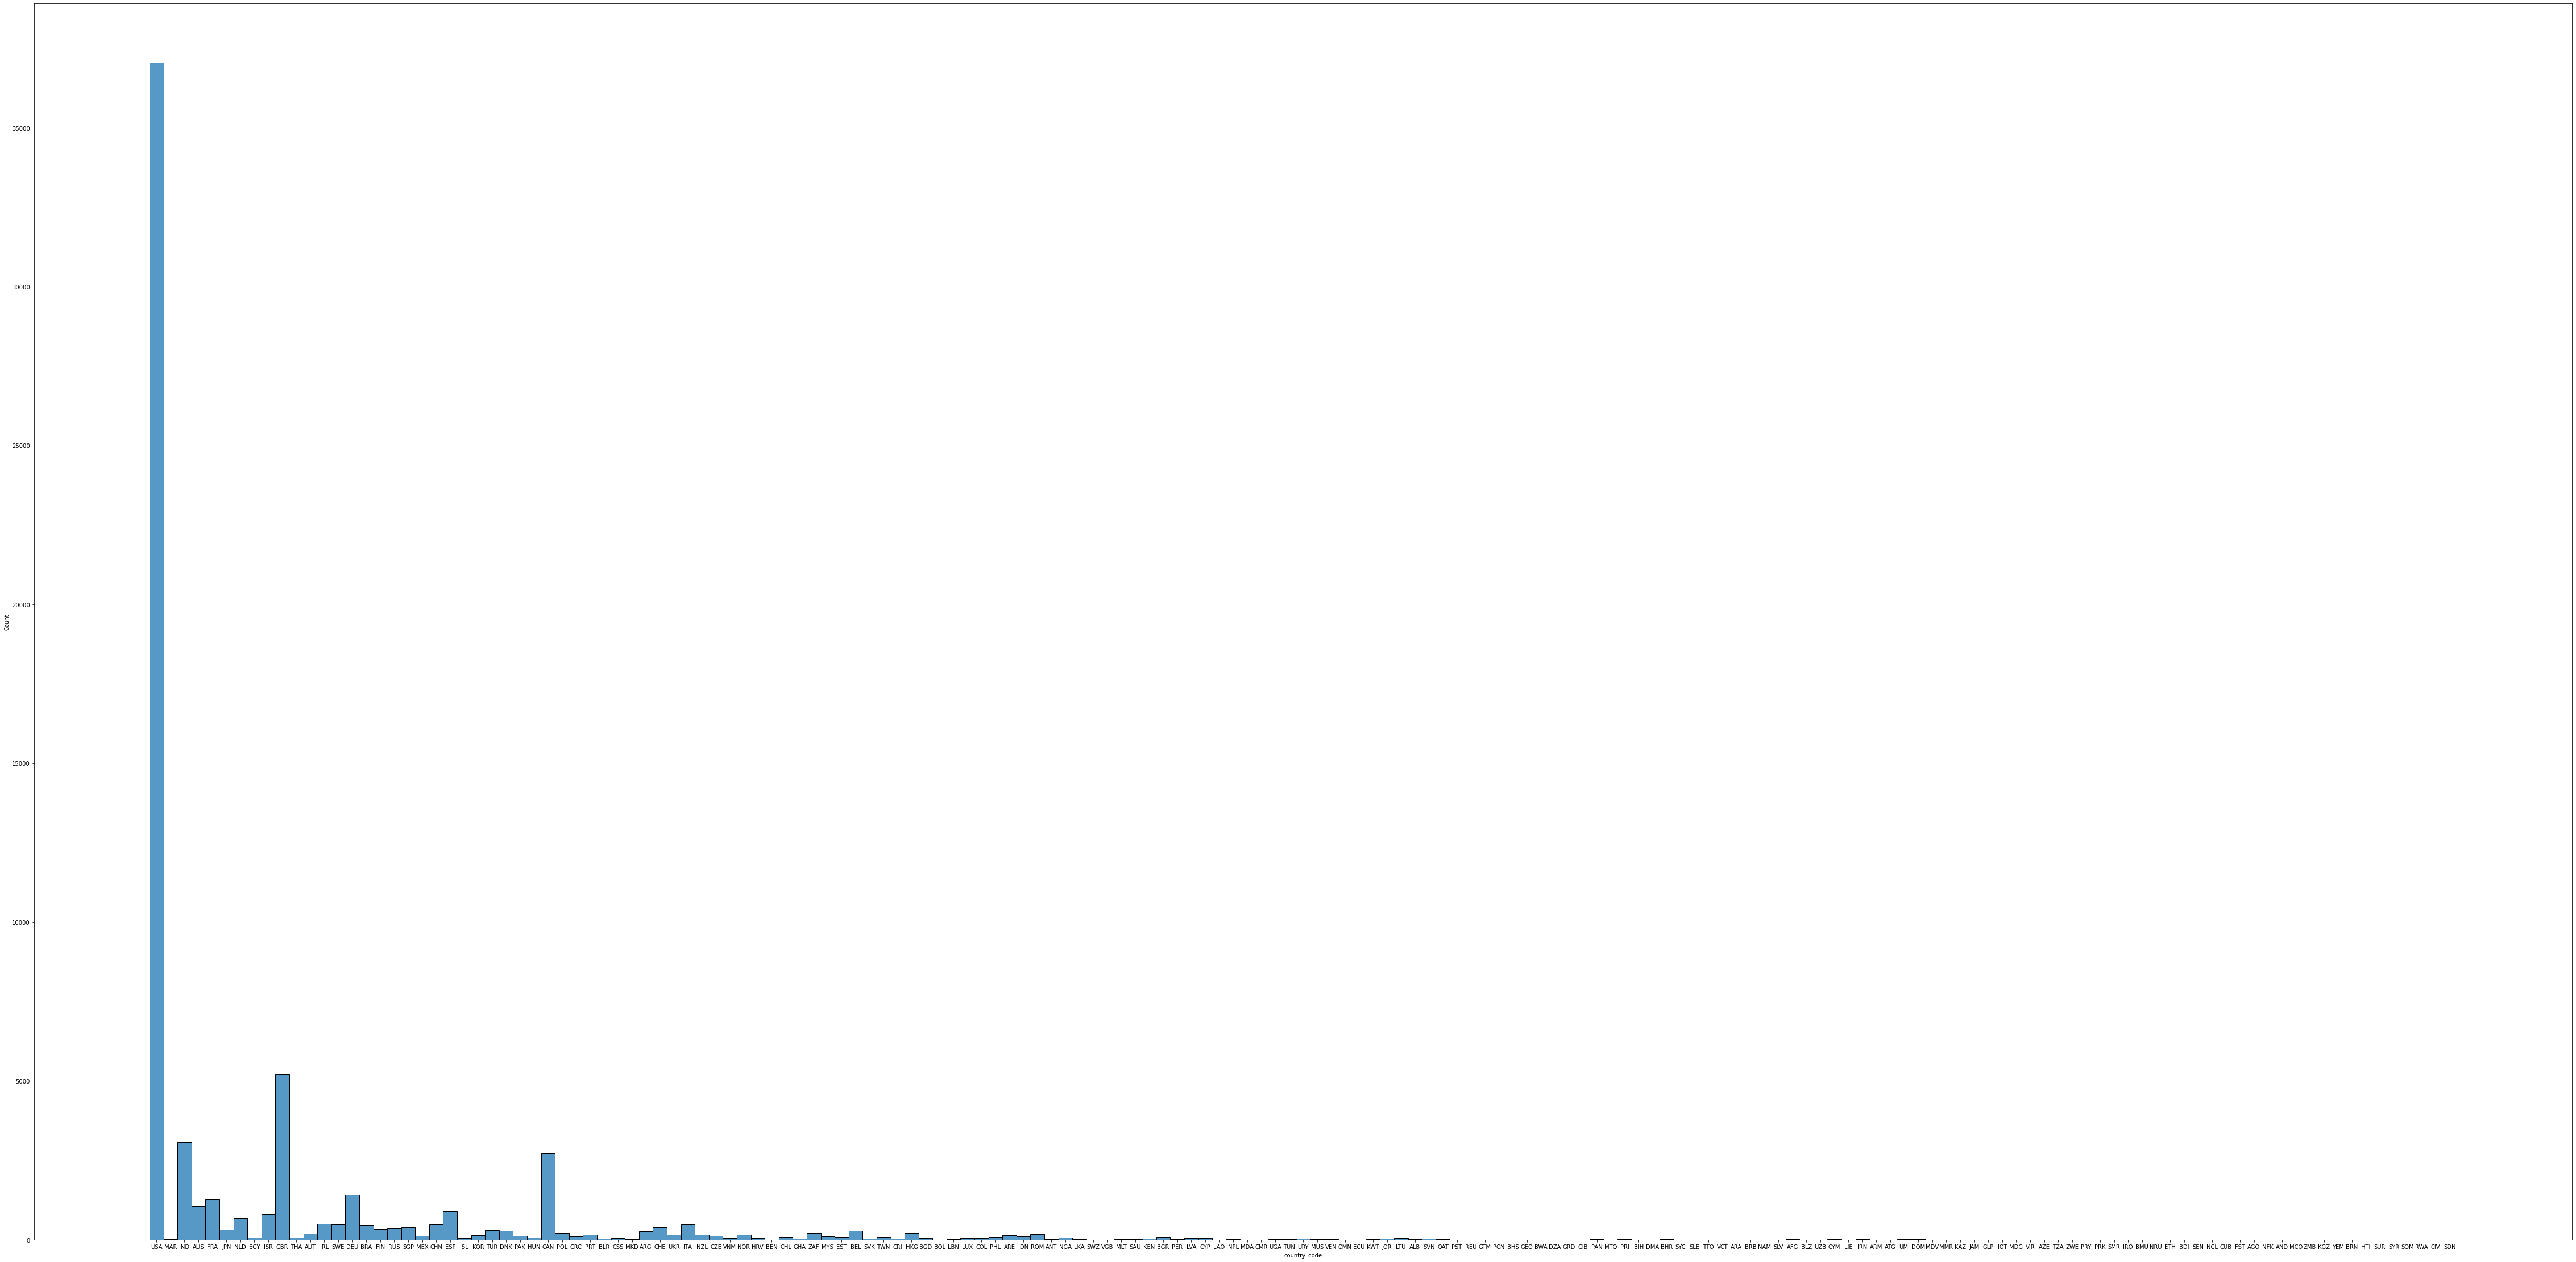

In [328]:
plt.figure(figsize= (80,40))
sns.histplot(data['country_code'])

**Top 10 category of Country_code columns.**
- USA
- GBR
- IND
- CAN
- DEU
- FRA
- AUS
- ESP
- ISR
- NLD


## Correlation :

In [382]:
df_corr = data.corr().abs()

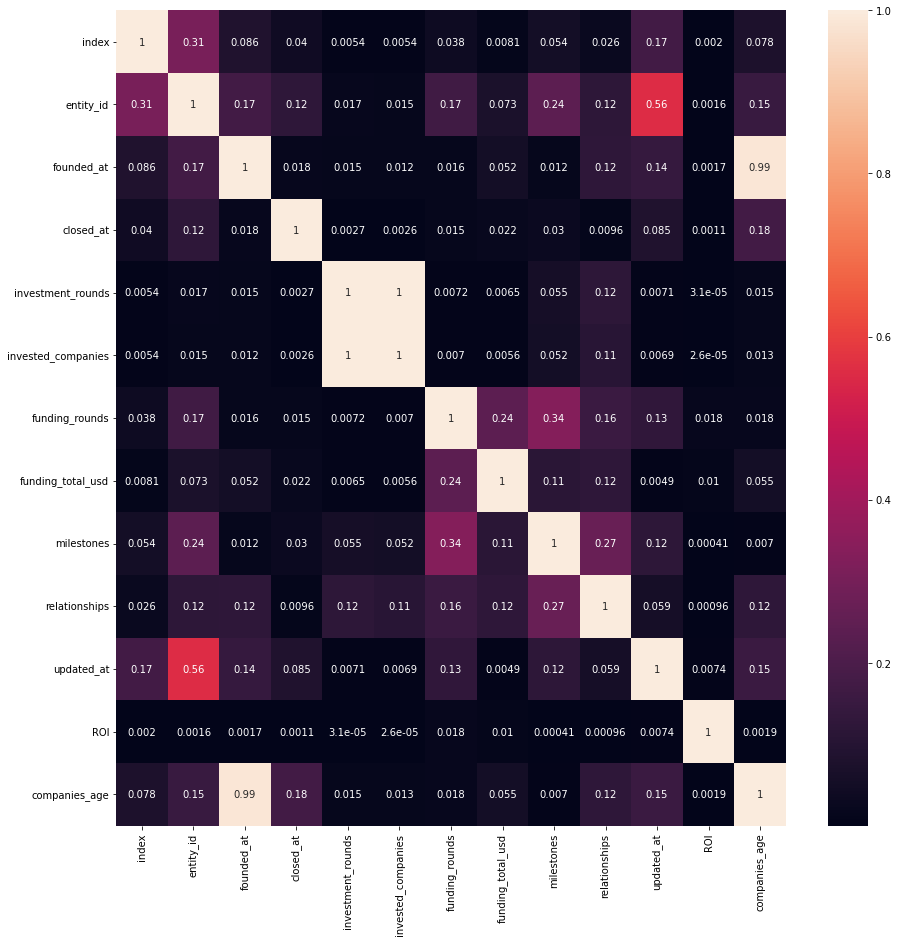

In [384]:
plt.figure(figsize = (15,15))
sns.heatmap(df_corr, annot = True)
plt.show()

Correlation between the columns in our dataset using heatmap.
- Investment Round and Invested Companies columns are highly correlated columns, and we can drop any of the column further.
- Founted at and Companies age columns are also highly correlated columns.

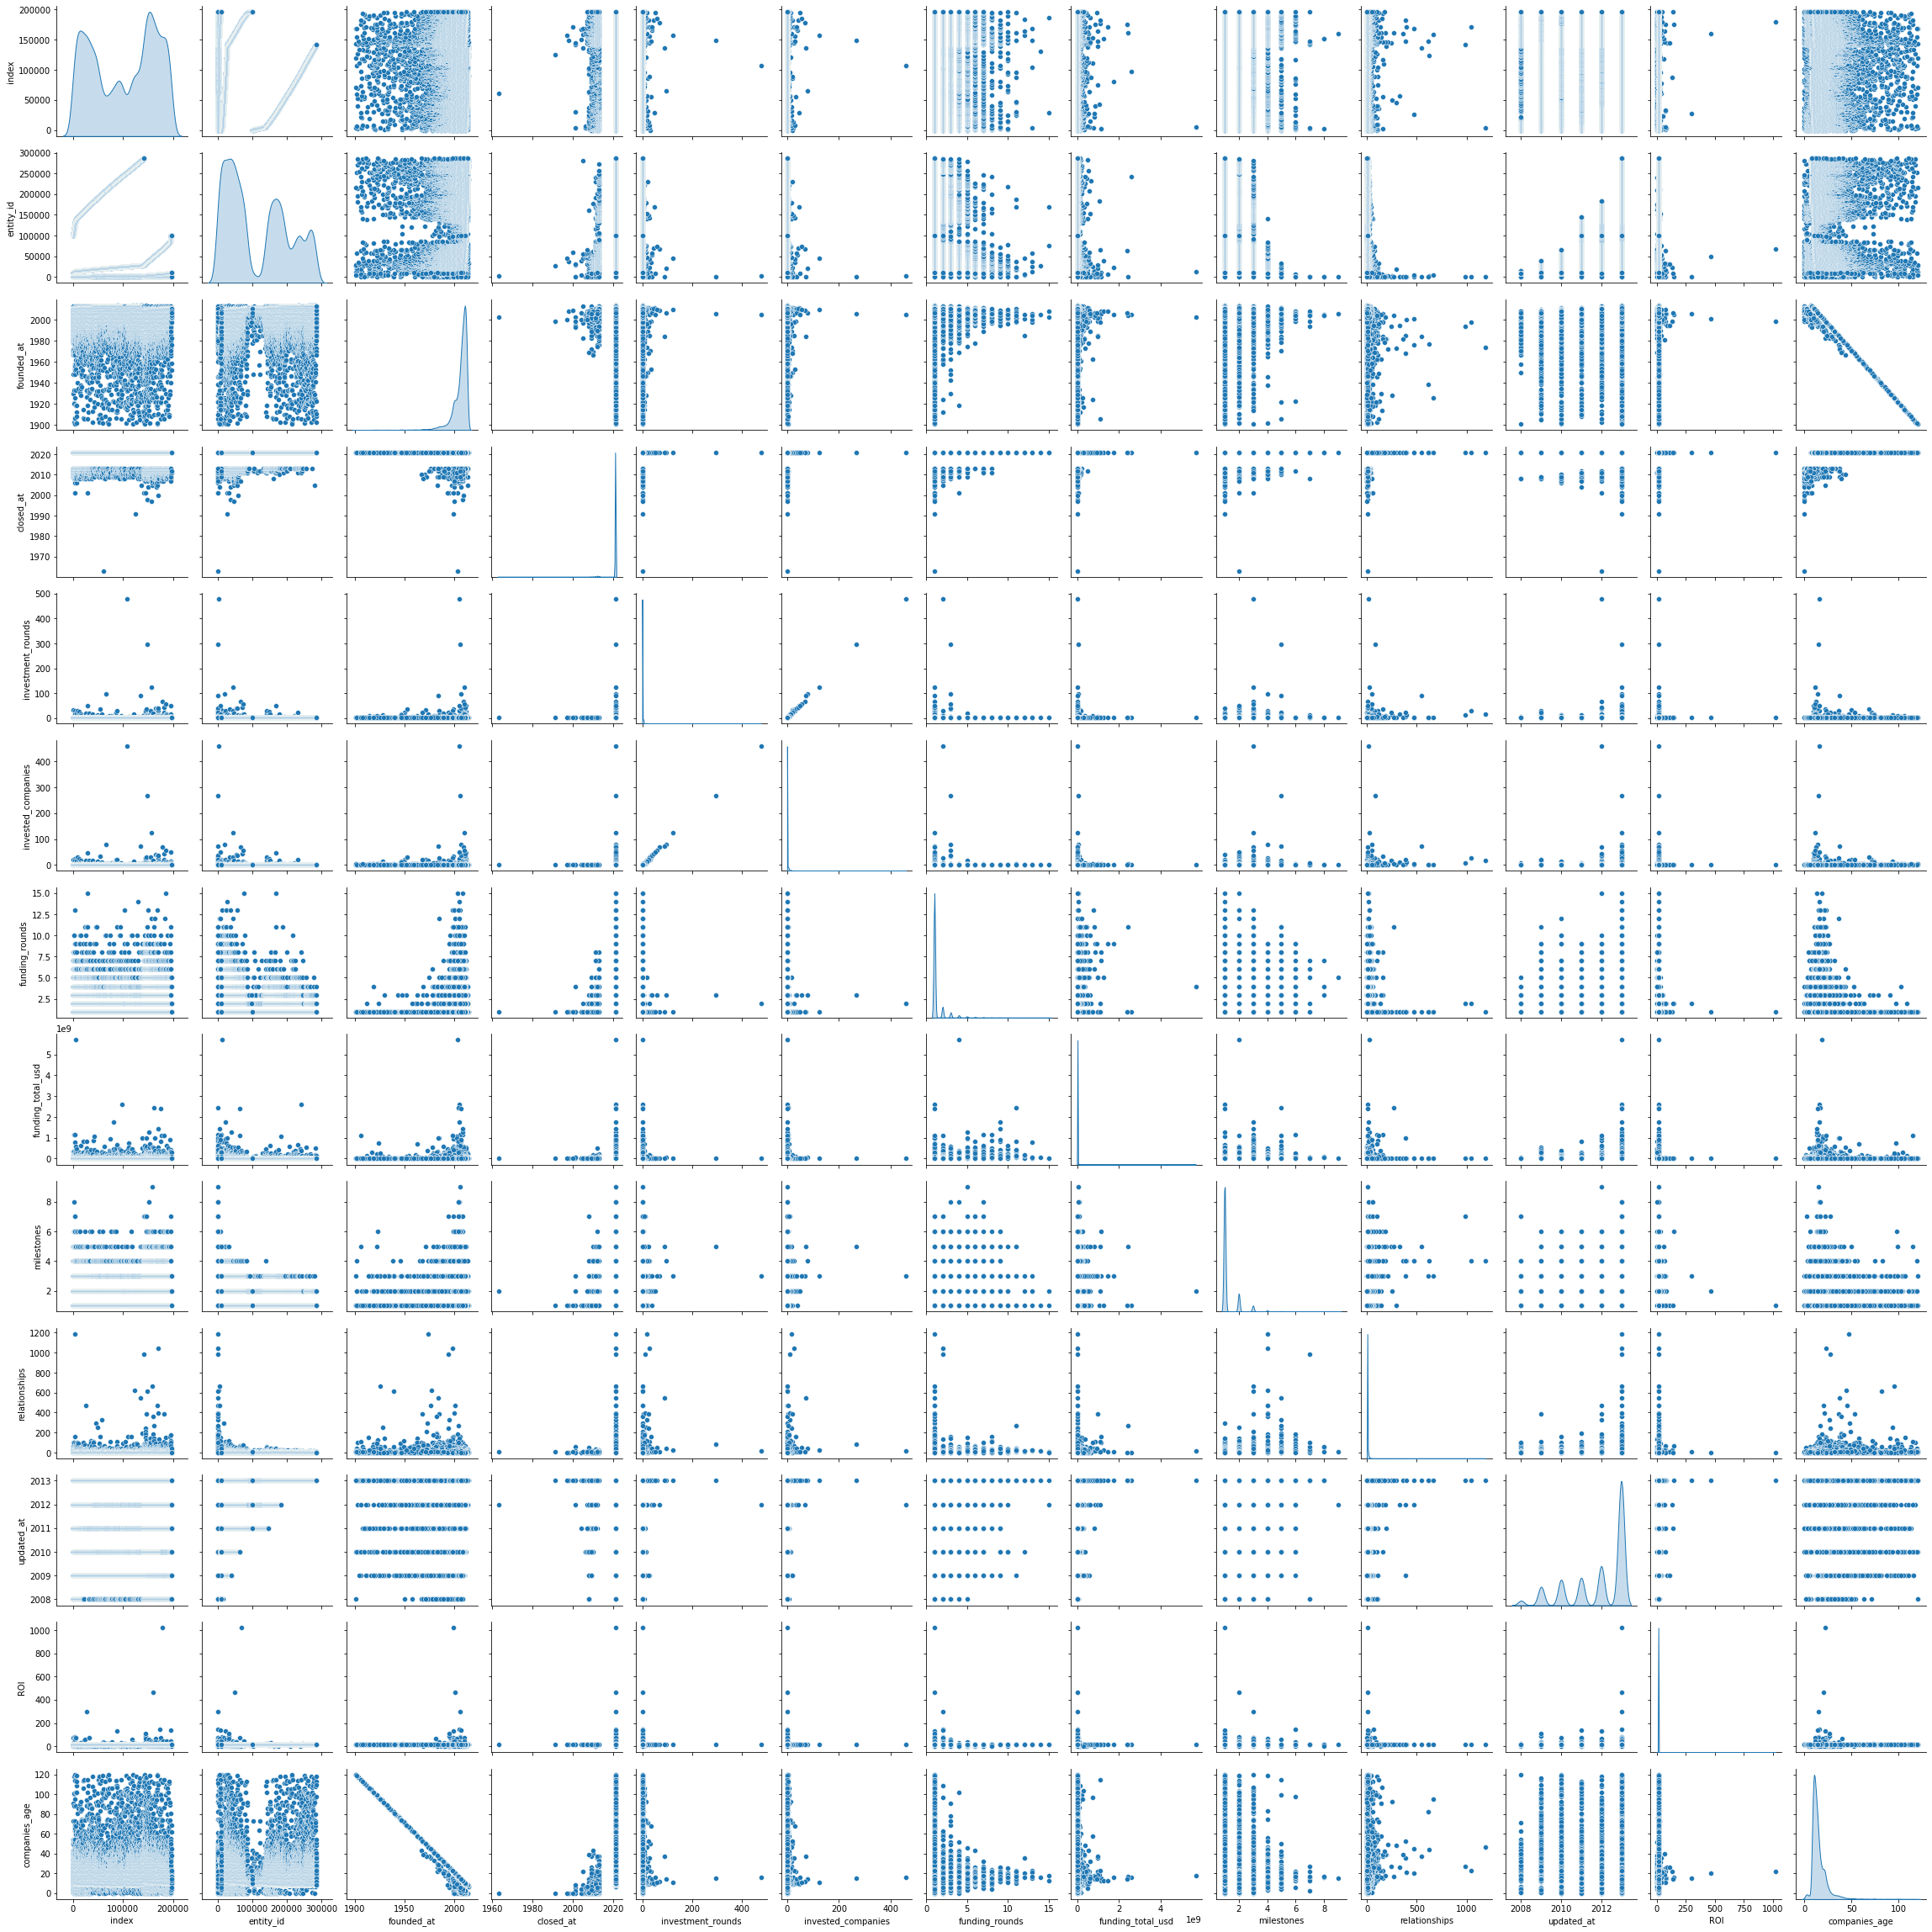

In [385]:
sns.pairplot(data, diag_kind = 'kde')

**Plotting pairplot on the dataset.**

## Normal Distribution :

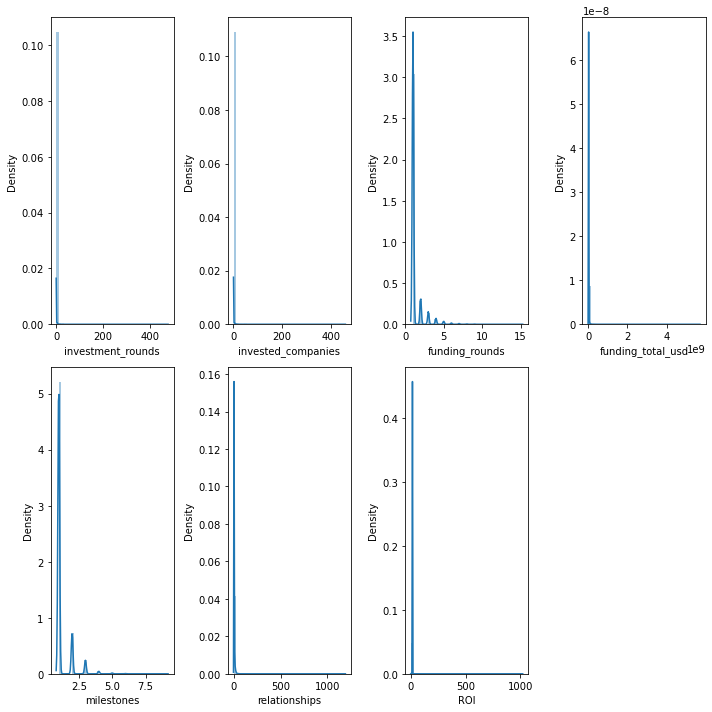

In [486]:
plt.figure(figsize = (10,10))
plotnumber = 1

for column in data[['investment_rounds','invested_companies','funding_rounds','funding_total_usd','milestones','relationships','ROI']]:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 10)
    
    plotnumber+=1
plt.tight_layout()

- Dataset is not normally distributed.
- Dataset is very much skewed.
- Dataset will also have many outliers.

## Before Removing Outliers:

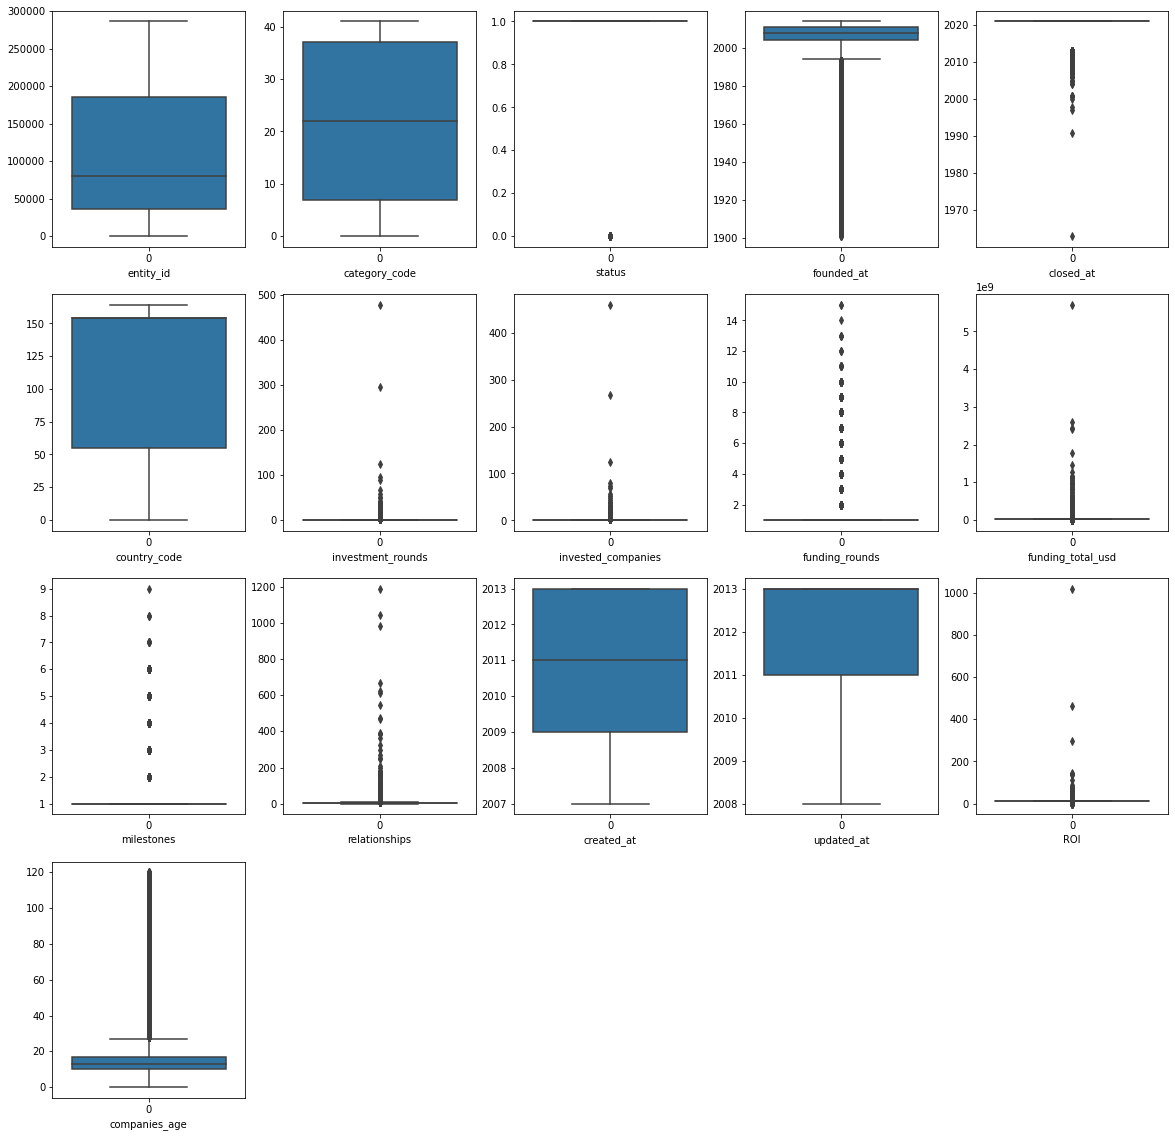

In [608]:
plt.figure(figsize = (20,20))
graph = 1
for column in data.drop(columns = ['name'],axis=1):
    if graph <= 20:
        plt.subplot(4,5,graph)
        ax = sns.boxplot(data = data[column])
        plt.xlabel(column, fontsize = 10)
    graph += 1
plt.show()

In [609]:
data[['funding_total_usd','funding_rounds']].describe()

,funding_total_usd,funding_rounds
count,6.409400e+04,64094.000000
mean,1.581978e+07,1.287749
std,3.950322e+07,0.873294
min,2.910000e+02,1.000000
25%,1.500000e+07,1.000000
50%,1.581978e+07,1.000000
75%,1.581978e+07,1.000000
max,5.700000e+09,15.000000


In [610]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

In [611]:
high = (q3.funding_total_usd + (1.5 * iqr.funding_total_usd))
print(high)

index = np.where(data['funding_total_usd'] > high)
print(index)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

17049455.46631492
(array([    0,     7,    10, ..., 64031, 64065, 64078]),)
(60069, 17)


,index,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age
0,5,10002,Synergie Media,0,1,2007,2021.0,91,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,14.0
1,6,10003,Green Basti Ecosystems,4,1,2008,2021.0,68,1.0,1.0,1.0,1.581978e+07,1.0,4.43465,2008,2010,14.41045,13.0
2,12,10009,dimension5 labs,0,1,2008,2021.0,154,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,13.0
3,13,1001,FriendFeed,41,0,2007,2021.0,154,1.0,1.0,1.0,5.000000e+06,3.0,14.00000,2007,2013,9.50000,14.0
4,15,10011,PoetryVisualized.com,12,1,2008,2021.0,154,1.0,1.0,1.0,1.581978e+07,1.0,3.00000,2008,2009,14.41045,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60064,196548,99940,Webgility,7,1,2007,2021.0,154,1.0,1.0,1.0,1.581978e+07,2.0,5.00000,2011,2013,14.41045,14.0
60065,196549,9995,FohBoh,31,1,2007,2021.0,154,1.0,1.0,1.0,7.500000e+05,1.0,14.00000,2008,2013,14.41045,14.0
60066,196550,9996,CSC,5,1,1959,2021.0,154,1.0,1.0,1.0,1.581978e+07,3.0,44.00000,2008,2013,14.41045,62.0
60067,196551,9997,Top-candidate,33,1,2008,2021.0,154,1.0,1.0,1.0,1.581978e+07,1.0,1.00000,2008,2013,14.41045,13.0


In [612]:
high_fu = (q3.funding_rounds + (1.5 * iqr.funding_rounds))
print(high_fu)

index_fu = np.where(data['funding_rounds'] > high)
print(index_fu)

data = data.drop(data.index[index_fu])
print(data.shape)

data.reset_index()

1.0
(array([], dtype=int64),)
(60069, 17)


,index,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age
0,5,10002,Synergie Media,0,1,2007,2021.0,91,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,14.0
1,6,10003,Green Basti Ecosystems,4,1,2008,2021.0,68,1.0,1.0,1.0,1.581978e+07,1.0,4.43465,2008,2010,14.41045,13.0
2,12,10009,dimension5 labs,0,1,2008,2021.0,154,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,13.0
3,13,1001,FriendFeed,41,0,2007,2021.0,154,1.0,1.0,1.0,5.000000e+06,3.0,14.00000,2007,2013,9.50000,14.0
4,15,10011,PoetryVisualized.com,12,1,2008,2021.0,154,1.0,1.0,1.0,1.581978e+07,1.0,3.00000,2008,2009,14.41045,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60064,196548,99940,Webgility,7,1,2007,2021.0,154,1.0,1.0,1.0,1.581978e+07,2.0,5.00000,2011,2013,14.41045,14.0
60065,196549,9995,FohBoh,31,1,2007,2021.0,154,1.0,1.0,1.0,7.500000e+05,1.0,14.00000,2008,2013,14.41045,14.0
60066,196550,9996,CSC,5,1,1959,2021.0,154,1.0,1.0,1.0,1.581978e+07,3.0,44.00000,2008,2013,14.41045,62.0
60067,196551,9997,Top-candidate,33,1,2008,2021.0,154,1.0,1.0,1.0,1.581978e+07,1.0,1.00000,2008,2013,14.41045,13.0


## After Removing Outliers:

<AxesSubplot:xlabel='funding_total_usd'>

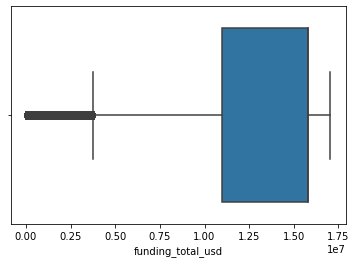

In [613]:
sns.boxplot(data['funding_total_usd'])

<AxesSubplot:xlabel='funding_rounds'>

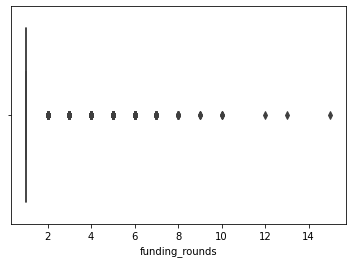

In [614]:
sns.boxplot(data['funding_rounds'])

## Encoding :

**- Encoding the Category Code column by replace method.**

In [87]:
data['category_code'] = data['category_code'].replace(['public_relations','hardware','network_hosting','education','search','cleantech','analytics','finance','social','security','health','medical','semiconductor','legal','travel','news','manufacturing','fashion','hospitality','real_estate','photo_video','messaging','music','local','sports','transportation','nonprofit','automotive','design','nanotech','pets','government'],'other')

In [88]:
data['category_code'].value_counts()

other          20703
software       11481
web             8055
ecommerce       5048
mobile          3941
advertising     3776
games_video     2936
consulting      2843
enterprise      2775
biotech         2536
Name: category_code, dtype: int64

**- Encoding the Country code column,**

In [89]:
top = ['USA','GBR','IND','CAN','DEU','FRA','AUS','ESP','ISR','NLD']

In [90]:
data.loc[~data['country_code'].isin(top),'country_code'] = 'other'

In [91]:
data['country_code'].value_counts()

USA      37055
other     9941
GBR       5205
IND       3071
CAN       2711
DEU       1419
FRA       1269
AUS       1045
ESP        898
ISR        808
NLD        672
Name: country_code, dtype: int64

**- Get dummies method on dataset.**

In [92]:
data = pd.get_dummies(data, columns = ['category_code','country_code'])

In [93]:
data.drop(columns = ['name','invested_companies'],inplace = True)

In [94]:
data.shape

(64094, 35)

Shape of the dataset after encoding.

## Imbalanced Target Column:

In [95]:
data.status.value_counts()

operating    57953
acquired      3900
closed        1629
ipo            612
Name: status, dtype: int64

In [96]:
data['status'] = data['status'].replace('operating',1)
data['status'] = data['status'].replace('ipo',1)
data['status'] = data['status'].replace('closed',0)
data['status'] = data['status'].replace('acquired',0)

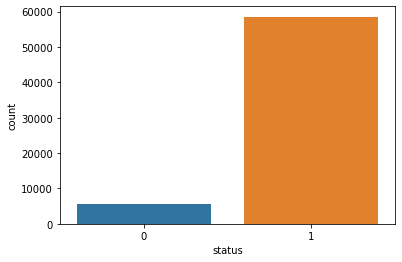

In [97]:
sns.countplot(data.status)
plt.show()

Our target column is not balanced and need to work on the imbalance column:

In [98]:
x = data.drop('status',axis = 1)
y = data.status

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 4)

In [103]:
ds = NearMiss(0.75)
x_train_nm,y_train_nm = ds.fit_resample(x_train,y_train)

In [104]:
print('Before Fit: {}'.format(Counter(y_train)))
print('After Fit: {}'.format(Counter(y_train_nm)))

Before Fit: Counter({1: 43921, 0: 4149})
After Fit: Counter({1: 5532, 0: 4149})


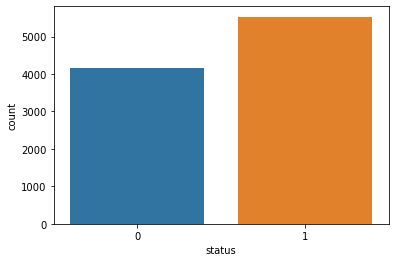

In [106]:
sns.countplot(y_train_nm)
plt.show()

**Now, our target column is balanced.**

## Final Dataset

In [107]:
data

,index,entity_id,status,founded_at,closed_at,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,...,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
0,0,1,1,2005,2021.0,1.0,3.0,3.975000e+07,5.0,17.00000,...,0,0,0,0,0,0,0,0,1,0
1,5,10002,1,2007,2021.0,1.0,1.0,1.581978e+07,1.0,2.00000,...,0,0,0,0,0,0,0,0,0,1
2,6,10003,1,2008,2021.0,1.0,1.0,1.581978e+07,1.0,4.43465,...,0,0,0,0,0,1,0,0,0,0
3,12,10009,1,2008,2021.0,1.0,1.0,1.581978e+07,1.0,2.00000,...,0,0,0,0,0,0,0,0,1,0
4,13,1001,0,2007,2021.0,1.0,1.0,5.000000e+06,3.0,14.00000,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64089,196548,99940,1,2007,2021.0,1.0,1.0,1.581978e+07,2.0,5.00000,...,0,0,0,0,0,0,0,0,1,0
64090,196549,9995,1,2007,2021.0,1.0,1.0,7.500000e+05,1.0,14.00000,...,0,0,0,0,0,0,0,0,1,0
64091,196550,9996,1,1959,2021.0,1.0,1.0,1.581978e+07,3.0,44.00000,...,0,0,0,0,0,0,0,0,1,0
64092,196551,9997,1,2008,2021.0,1.0,1.0,1.581978e+07,1.0,1.00000,...,0,0,0,0,0,0,0,0,1,0


This is the final dataset.


## Scaling the dataset.

**- Seperating the features and target column.**

In [108]:
x = data.drop('status',axis = 1)
y = data.status

**- Using Standard Scaler to scale the features.**

In [109]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.59998457, -1.30397909, -0.04797377, ..., -0.10293538,
         0.85422427, -0.42845358],
       [-1.59990584, -1.19107367,  0.15888356, ..., -0.10293538,
        -1.17065277,  2.33397513],
       [-1.5998901 , -1.19106238,  0.26231222, ..., -0.10293538,
        -1.17065277, -0.42845358],
       ...,
       [ 1.4945807 , -1.1911414 , -4.80569235, ..., -0.10293538,
         0.85422427, -0.42845358],
       [ 1.49459644, -1.19113012,  0.26231222, ..., -0.10293538,
         0.85422427, -0.42845358],
       [ 1.49461219, -1.19111883,  0.15888356, ..., -0.10293538,
         0.85422427, -0.42845358]])